In [1]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
from skimage import data

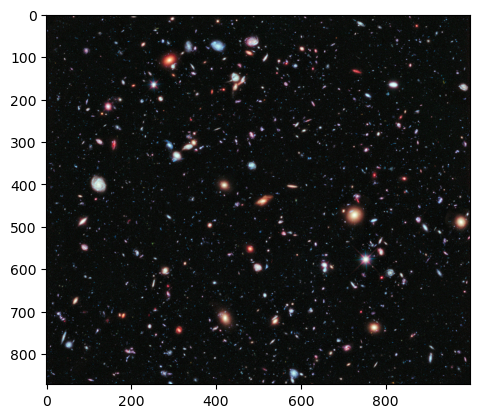

In [2]:
plt.imshow(data.hubble_deep_field())

In [3]:
img = imread("./imgs/220926_Sat.png")

In [4]:
type(img)

numpy.ndarray

In [5]:
np.max(img[:,:,1])

0.76862746

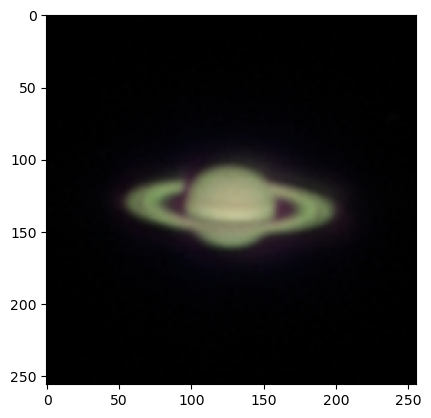

In [6]:
plt.imshow(img)

In [7]:
np.median(img[:,:,3])

1.0

In [8]:
def dot_prod(m1, m2):
    assert m1.shape == m2.shape
    return np.sum(m1.flatten() * m2.flatten())

In [7]:
def convolve(img, ker) -> np.ndarray:
    imshape = img.shape
    assert ker.shape[0] == ker.shape[1]
    offset = ker.shape[0] - 2
    out = np.ndarray((img.shape[0] - (2 * offset), img.shape[1] - (2 * offset)))

    for x_pos in range(out.shape[0]-offset):
        for y_pos in range(out.shape[1]-offset):
            img_x_pos = x_pos
            img_y_pos = y_pos
            slice = img[img_x_pos:img_x_pos + ker.shape[0], img_y_pos:img_y_pos + ker.shape[1]]
            out[x_pos, y_pos] = dot_prod(slice, ker)
            
    
    return out

    

In [10]:
ker = np.array([[0, -25, 0], [-25, 100, -25], [0,-25,0]])

In [11]:
ker_h = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

In [12]:
ker.shape

(3, 3)

In [19]:
img_c = np.ndarray((254, 254, 4))
img_c[:,:,3] = img[:,:, 3][1:255, 1:255]

for i in range(img.shape[2]):
    img_c[:,:,i] = np.abs(convolve(img[:,:,i], ker))

(254, 254)
(254, 254)
(254, 254)
(254, 254)


In [15]:
coins_convolved = convolve(data.coins(), ker_h)

(301, 382)


In [16]:
coins_convolved = np.abs(coins_convolved)

In [17]:
np.median(coins_convolved)

12.0

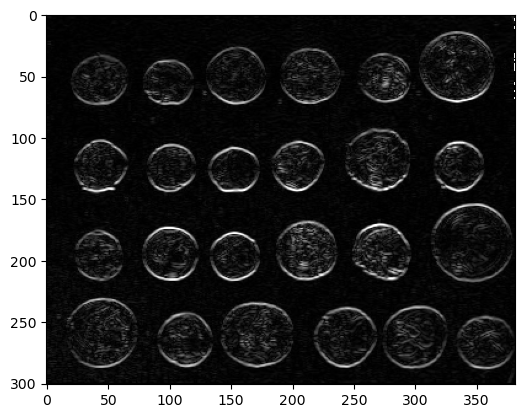

In [18]:
plt.imshow(coins_convolved, cmap="gray", vmin=0, vmax=500)

In [3]:
coins = data.coins()

In [4]:
coins.shape

(303, 384)

In [5]:
def partitions(img, tile_size, n_tiles):
    X = []
    T = []

    for _ in range(n_tiles):
        buffer = int(tile_size/2)
        x_start = np.random.randint(buffer, img.shape[0] - (tile_size + buffer))
        y_start = np.random.randint(buffer, img.shape[1] - (tile_size + buffer))

        X.append(img[x_start:x_start + tile_size, y_start:y_start + tile_size])
        x_start_t = x_start - buffer
        y_start_t = y_start - buffer
        T.append(img[x_start_t:x_start + tile_size + buffer, y_start_t:y_start + tile_size + buffer])

    return X, T

In [6]:
datas = partitions(coins, 50, 1000)

In [7]:
test = partitions(coins, 50, 50)

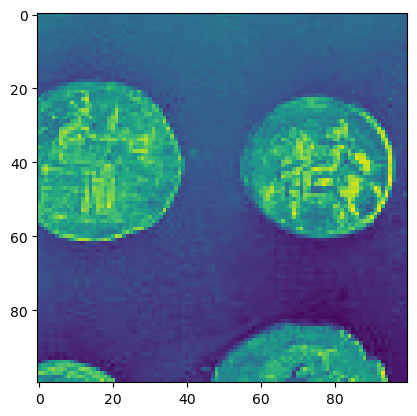

In [8]:
plt.imshow(datas[1][1])

In [9]:
from Reg_NeuralNet import NeuralNetwork

In [10]:
X = datas[0]
T = datas[1]

In [11]:
X = np.array([np.array(arr).flatten() for arr in X])
T = np.array([np.array(arr).flatten() for arr in T])

In [12]:
X.shape, T.shape

((1000, 2500), (1000, 10000))

In [13]:
Xtest = test[0]
Ttest= test[1]

In [14]:
Xtest = np.array([np.array(arr).flatten() for arr in Xtest])
Ttest = np.array([np.array(arr).flatten() for arr in Ttest])

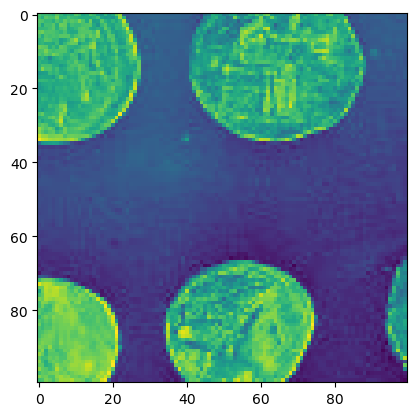

In [15]:
plt.imshow(Ttest[0].reshape(100,100))

In [16]:
nn = NeuralNetwork(2500, [500, 500], 10000)

In [93]:
nn.train(X, T, 500, 0.0002)

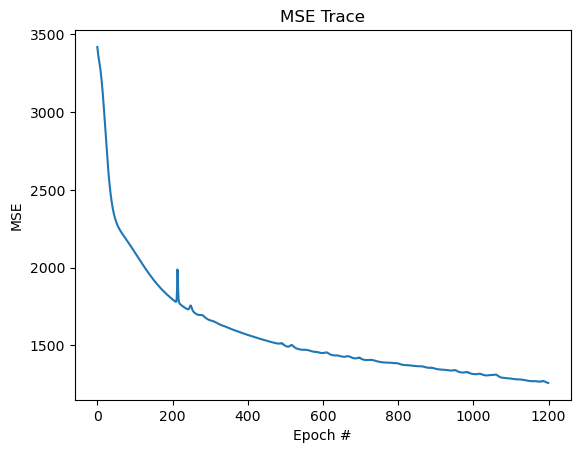

In [94]:
nn.plot_mse_trace()

In [95]:
Y = nn.use(Xtest)

In [81]:
Y.shape

(50, 10000)

In [17]:
nn2 = NeuralNetwork(2500, [500, 500, 500, 1000], 10000)

In [43]:
nn2.train(X, T, 10, 0.001)

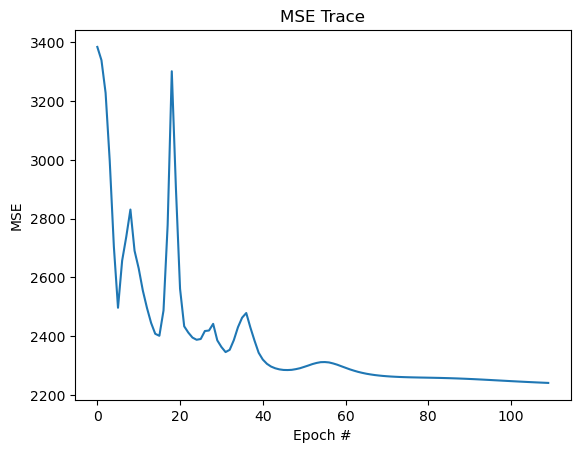

In [44]:
nn2.plot_mse_trace()

In [41]:
Y = nn2.use(Xtest)

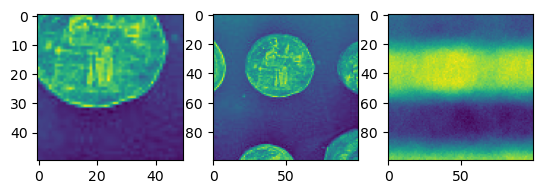

In [42]:
n = 45

fig, axes = plt.subplots(1, 3)
axes[0].imshow(Xtest[n].reshape(50,50))
axes[1].imshow(Ttest[n].reshape(100,100))
axes[2].imshow(Y[n].reshape(100,100))